# **Iris Flowers Classification**
The Iris flower data set or Fisher's Iris data set is a multivariate data set used and made famous by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other. Fisher's paper was published in the Annals of Eugenics and includes discussion of the contained techniques' applications to the field of phrenology.


## **Iris Setosa**
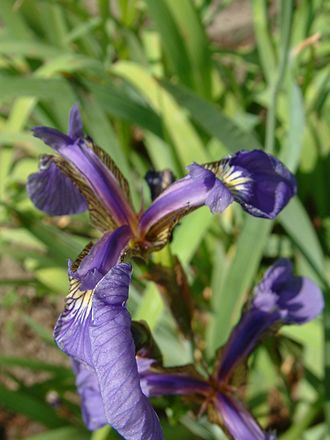

# **Iris Versicolor**
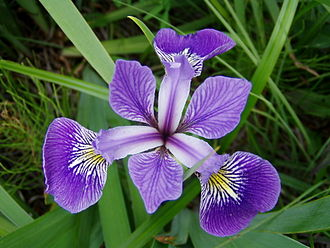

# **Iris Virginica**
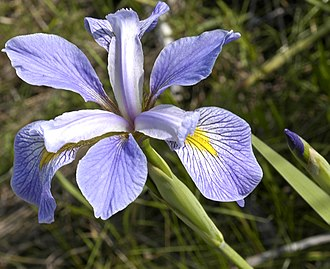

# **Importing Libraries**

In [ ]:
import pandas as pd, plotly.express as px, numpy as np, matplotlib.pyplot as plt, seaborn as sns

# **2. Exploratory Data Analysis**

In [ ]:
# uploading dataset
from google.colab import files
files.upload()

In [ ]:
# reading dataset
df = pd.read_csv('iris.csv')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# checking null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Since we have no null values, we do not need to alter any data values.

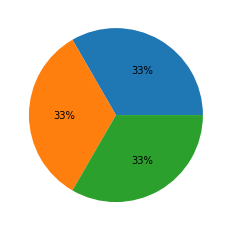

In [ ]:
# checking class balance
fig = plt.pie(df['Species'].value_counts(), autopct='%.0f%%')
plt.show()

All classes are evenly distributed and there is no class imbalance. There is no need to fix imbalance by using techniques like SMOTE.

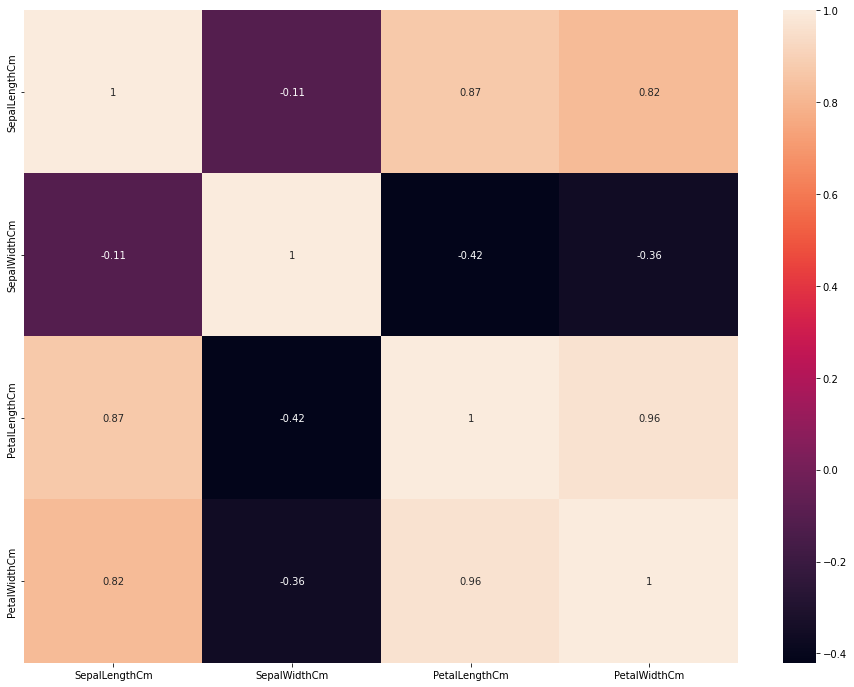

In [ ]:
 # Checking correlations
 corr = df.corr()
 plt.figure(figsize=(16, 12))
 g = sns.heatmap(df.corr(), annot=True)

# **Building a Model**

In [ ]:
 # splitting the data into training and testing
 from sklearn.model_selection import train_test_split
 train, test = train_test_split(df, test_size=0.2, random_state=1)
 test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
14,5.8,4.0,1.2,0.2,Iris-setosa
98,5.1,2.5,3.0,1.1,Iris-versicolor
75,6.6,3.0,4.4,1.4,Iris-versicolor
16,5.4,3.9,1.3,0.4,Iris-setosa
131,7.9,3.8,6.4,2.0,Iris-virginica


In [ ]:
# installing required library
# !pip install pycaret

In [ ]:
# importing classification library
from pycaret.classification import *
setup(# defining training data
      data = train,
      # defining target variable
      target = 'Species',
      train_size = 0.75,
      transformation = True)

In [ ]:
# we run multiple classifiers and rank them by the accuracy
compare_models(sort = 'Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9778,1.0000,0.9806,0.9843,0.9778,0.9667,0.9698,0.012
dt,Decision Tree Classifier,0.9667,0.9762,0.9694,0.9759,0.9663,0.9500,0.9548,0.012
qda,Quadratic Discriminant Analysis,0.9667,1.0000,0.9667,0.9783,0.9636,0.9500,0.9572,0.011
nb,Naive Bayes,0.9556,0.9963,0.9611,0.9630,0.9562,0.9333,0.9365,0.010
ada,Ada Boost Classifier,0.9556,0.9981,0.9611,0.9685,0.9556,0.9333,0.9397,0.060
gbc,Gradient Boosting Classifier,0.9556,0.9963,0.9639,0.9694,0.9562,0.9333,0.9397,0.140
lr,Logistic Regression,0.9444,0.9963,0.9500,0.9635,0.9420,0.9167,0.9270,0.336
svm,SVM - Linear Kernel,0.9444,0.0000,0.9472,0.9626,0.9413,0.9167,0.9270,0.011
et,Extra Trees Classifier,0.9444,0.9963,0.9500,0.9546,0.9448,0.9167,0.9214,0.117
knn,K Neighbors Classifier,0.9333,0.9870,0.9389,0.9407,0.9340,0.9000,0.9032,0.014


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:compare_models() succesfully completed......................................


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

The Linear Discriminant Analysis Model gives us the best Accuracy score of 97.78%. We will use this as our final model.

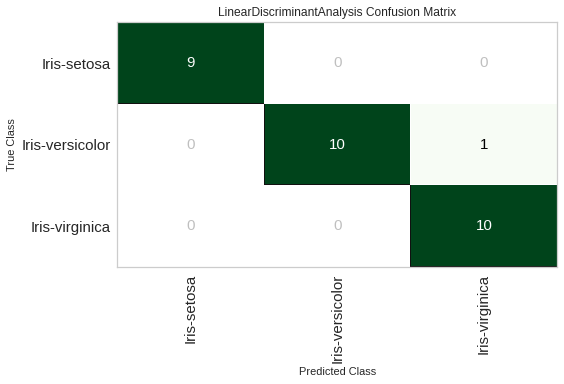

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# confusion matrix
lda = create_model('lda')
plot_model(lda, plot = 'confusion_matrix')

In [ ]:
# model performance on test set
#predictions = predict_model(lda, data=test)
test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
14,5.8,4.0,1.2,0.2,Iris-setosa
98,5.1,2.5,3.0,1.1,Iris-versicolor
75,6.6,3.0,4.4,1.4,Iris-versicolor
16,5.4,3.9,1.3,0.4,Iris-setosa
131,7.9,3.8,6.4,2.0,Iris-virginica
56,6.3,3.3,4.7,1.6,Iris-versicolor
141,6.9,3.1,5.1,2.3,Iris-virginica
44,5.1,3.8,1.9,0.4,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa
120,6.9,3.2,5.7,2.3,Iris-virginica


In [ ]:
dt = create_model('dt')
predictions = predict_model(lda, data=test)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.8889,0.9167,0.8889,0.9167,0.8857,0.8333,0.8492
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8889,0.9167,0.8889,0.9167,0.8857,0.8333,0.8492
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.8889,0.9286,0.9167,0.9259,0.8921,0.8333,0.8492


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 11
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5850, splitter='best')
INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION,

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.0,1.0,0,0,0,0,0


# **4. Conclusion**
We have successfully used exploratory data analysis on the iris data set. 
The dataset was divided as 80% training and 20% testing data. 
Multiple models were used to analyse the dataset and classify the labels.
The best accuracy was found to be given by Linear Discriminant Analysis and Decision Tree Classifiers.

Using LDA, we make the classifications on the test set and get accuracy of 96.67%